In [1]:
import sys
sys.path.append('..')

In [7]:
default_net_name = 'deepnet'
# lbl_file = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache/sh_trn4523_gtcomplete_cacheddata_bestPrms20180920_retrain20180920T123534_withGTres.lbl'
lbl_file = '/groups/branson/bransonlab/apt/experiments/data/sh_trn4879_gtcomplete_cacheddata_dlstripped.lbl'
crop_size = [[230,350],[350,350]]
# name = 'stephen_20181029'
cache_dir = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache'
model_type = 'mdn'
from trackStephenHead_KB import update_conf
import APT_interface as apt
import PoseUNet_resnet as PoseURes
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
cur_name = 'stephen_20181115'
view = 1
conf = apt.create_conf(lbl_file,view=view,name=cur_name,cache_dir=cache_dir,net_type=model_type)
update_conf(conf)
tf.reset_default_graph()
self = PoseURes.PoseUMDN_resnet(conf, name='deepnet')
self.train_data_name = 'traindata'
V = self.classify_val(onTrain=True)
print np.percentile(V[0],[90,95,98,99],axis=0)

Label file is in v7.3 format. Loading using h5py
--- Loading the model by reconstructing the graph ---
Val DB does not exists: Data for validation from:/groups/branson/bransonlab/mayank/stephen_copy/apt_cache/proj42wcrops/mdn/view_1/stephen_20181115/train_TF.tfrecords
INFO:tensorflow:Restoring parameters from /groups/branson/bransonlab/mayank/stephen_copy/apt_cache/proj42wcrops/mdn/view_1/stephen_20181115/deepnet-20000


INFO:tensorflow:Restoring parameters from /groups/branson/bransonlab/mayank/stephen_copy/apt_cache/proj42wcrops/mdn/view_1/stephen_20181115/deepnet-20000


Parameters that do not match for /groups/branson/bransonlab/mayank/stephen_copy/apt_cache/proj42wcrops/mdn/view_1/stephen_20181115/traindata:
att_layers doesnt match
brange doesnt match
crange doesnt match
mdn_groups doesnt match
next doesnt match
op_affinity_graph doesnt match
selpts
New: [0 1 2 3 4]
Old: [0 1 2 3 4]
set_exp_name doesnt match


/groups/branson/bransonlab/mayank/venv/local/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


MemoryError: 

In [ ]:
default_net_name = 'deepnet'
crop_reg_file = '/groups/branson/bransonlab/mayank/stephen_copy/crop_regression_params.mat'
# lbl_file = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache/sh_trn4523_gtcomplete_cacheddata_bestPrms20180920_retrain20180920T123534_withGTres.lbl'
lbl_file = '/groups/branson/bransonlab/apt/experiments/data/sh_trn4879_gtcomplete_cacheddata_dlstripped.lbl'
crop_size = [[230,350],[350,350]]
# name = 'stephen_20181029'
cache_dir = '/groups/branson/bransonlab/mayank/stephen_copy/apt_cache'
model_type = 'mdn'
from trackStephenHead_KB import update_conf
import APT_interface as apt
import PoseUNet_resnet as PoseURes
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
cur_name = 'stephen_20181102_newlabels'
view = 1
conf = apt.create_conf(lbl_file,view=view,name=cur_name,cache_dir=cache_dir,net_type=model_type)
tf.reset_default_graph()
self = PoseURes.PoseUMDN_resnet(conf, name='deepnet')
self.train_data_name = 'traindata'
V1 = self.classify_val(onTrain=True)
print np.percentile(V1[0],[90,95,98,99],axis=0)

In [1]:
import sys
sys.path.append('..')
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf
tf.reset_default_graph()
from poseConfig import aliceConfig as conf
conf.cachedir += '_moreeval'
conf.use_unet_loss = True
conf.batch_size = 32
conf.labelfile = '/groups/branson/bransonlab/mayank/PoseTF/data/alice/multitarget_bubble_expandedbehavior_20180425_local.lbl'

/groups/branson/bransonlab/mayank/venv/local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [1]:
%matplotlib ipympl
from matplotlib import pyplot as plt
plt.imshow(np.random.rand(3,5))


KeyError: u'ipympl'

In [2]:
import pickle
with open('/groups/branson/bransonlab/mayank/PoseTF/cache/alice_moreeval/rnn_pp.p','r') as f:
    X = pickle.load(f)
from matplotlib import pyplot as plt

In [4]:
print len(X[0]),len(X[1])

2826 3290


In [17]:
import PoseTools
Y = PoseTools.json_load('/groups/branson/bransonlab/mayank/PoseTF/cache/alice_moreeval/splitdata.json')


In [24]:
print len(Y[0]),len(Y[1])

1413 3290


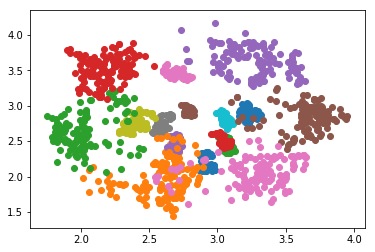

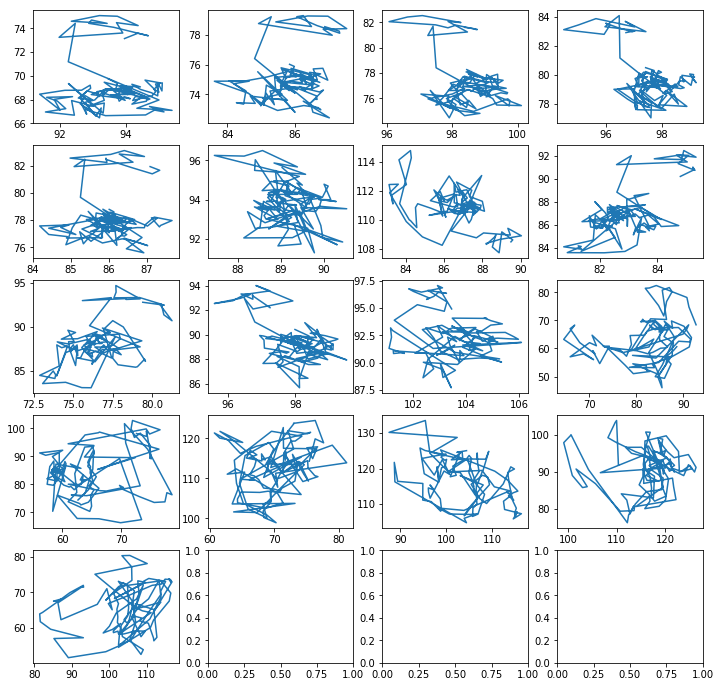

In [8]:
ndx = np.random.randint(len(X[0]))
rr = X[0][ndx][0]
for pt in range(17):
    plt.scatter(rr[:,pt,0],rr[:,pt,1])
f,ax = plt.subplots(5,4,figsize=(12,12))    
ax = ax.flatten()
for pt in range(17):
    ax[pt].plot(rr[:,pt,0]*32,rr[:,pt,1]*32)

In [ ]:
        net = PoseUNet_resnet.PoseUMDN_resnet(self.conf,self.mdn_name)
        sess, _ = net.restore_net_common(net.create_network)

        conf = self.conf
        on_gt = False
        db_files = ()
        if split_file is not None:
            predefined = PoseTools.json_load(split_file)
            split = False
        else:
            predefined = None

        mov_split = None

        local_dirs, _ = multiResData.find_local_dirs(conf, on_gt=False)
        lbl = h5py.File(conf.labelfile, 'r')
        view = conf.view
        flipud = conf.flipud
        npts_per_view = np.array(lbl['cfg']['NumLabelPoints'])[0, 0]
        sel_pts = int(view * npts_per_view) + conf.selpts

        out_fns = [True, False]
        data = [[],[]]
        count = 0


In [9]:
import sys
sys.path.append('..')
sys.path.append('/groups/branson/home/kabram/bransonlab/coco/cocoapi/PythonAPI')
%matplotlib inline
from matplotlib import pyplot as plt

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [10]:
from pycocotools.coco import COCO

In [4]:
import PoseTools

/groups/branson/bransonlab/mayank/venv/local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


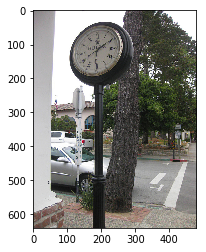

In [3]:
import imageio
ii = imageio.imread('/groups/branson/bransonlab/mayank/coco/train2017/000000000064.jpg')
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(ii)

In [5]:
import pawData
reload(pawData)
import myutils
reload(myutils)
pawData.createDB()

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


IOError: [Errno 2] No such file or directory: '/home/mayank/Dropbox/AdamVideos/M118_M119_M122_M127_M130_M173_M174_M147_20150615.mat'

In [6]:
kk = np.zeros([3,5,2])
kk[:,:,:] = np.nan
print kk
np.any(np.isnan(kk),axis=(0,1))

[[[ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]]

 [[ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]]

 [[ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]
  [ nan  nan]]]


array([ True,  True], dtype=bool)

In [ ]:
import sys
sys.path.append('/home/mayank/work/pyutils')
sys.path.append('/home/mayank/work/tensorflow')
import pawMulti
reload(pawMulti)
import myutils
reload(myutils)
import pawconfig
reload(pawconfig)
import multiPawTools
reload(multiPawTools)


pawMulti.train()

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import pawconfig as conf

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint
from multiPawTools import scalepatches


L = sio.loadmat(conf.labelfile)
pts = L['pts']
ts = L['ts']
expid = L['expidx']
    


In [ ]:
frames = np.where(expid[0,:]==4)[0]
fnum = ts[0,frames]
cap = cv2.VideoCapture('/home/mayank/Dropbox/AdamVideos/multiPoint/M118_20140730/M118_20140730_v002/movie_comb.avi')
print(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES,1)
stat,framein1 = cap.read()
cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES,2)
stat,framein2 = cap.read()
framein1 = framein1.astype('float')
framein2 = framein2.astype('float')
ddff = framein1-framein2
ddff = np.abs(ddff).astype('uint8')
print(stat)
if stat:
    plt.imshow(ddff)

print(ddff.max())    
cap.release()

In [ ]:
import myutils
reload(myutils)
import cv2
cap = cv2.VideoCapture('/home/mayank/Dropbox/AdamVideos/multiPoint/M118_20140730/M118_20140730_v002/movie_comb.avi')
ff = myutils.readframe(cap,1998)
print(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT ))
cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES, 1998)
print(cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES))
stat,ff = cap.read()
print(cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES))
print(stat)

In [ ]:
import moviepy.video.io.ffmpeg_reader as freader
reader = freader.FFMPEG_VideoReader('/home/mayank/Dropbox/AdamVideos/multiPoint/M118_20140730/M118_20140730_v002/movie_comb.avi')
f1 = reader.get_frame((-2.-0.1)/reader.fps)
f2 = reader.get_frame((1.-0.1)/reader.fps)
fe = reader.get_frame((1998.-0.1)/reader.fps)
type(f1)


In [ ]:
import cv2
cap = cv2.VideoCapture('/home/mayank/Dropbox/AdamVideos/movie_comb.avi')
          


In [ ]:
import pawconfig as conf
import scipy.io as sio
reload(conf)
L = sio.loadmat(conf.labelfile)
pts = L['pts']
ts = L['ts']
expid = L['expidx']
expid[0,3]

In [ ]:
import lmdb
env = lmdb.open('cacheHead/val_lmdb', readonly=True)
txn = env.begin()
print(env.stat())

In [ ]:
env.close()

In [ ]:
import caffe
import numpy as np
import re
import matplotlib.pyplot as plt
import pawData
reload(pawData)
cursor =txn.cursor()
cursor.first()

In [ ]:
import multiPawTools
reload(multiPawTools)
import pawconfig as conf
img,locs = multiPawTools.readLMDB(cursor,3,1)

In [ ]:
from scipy import misc
from scipy import ndimage
reload(multiPawTools)
reload(conf)
plt.gray()
ndx = 2
img = img.transpose([0,2,3,1])
plt.imshow(img[ndx,:,:,0])
plt.show()

blurL = multiPawTools.createLabelImages(locs,conf.imsz,conf.rescale*conf.pool_scale,
                                        conf.label_blur_rad,1)
x0 = multiPawTools.scaleImages(img,conf.rescale)
x1 = multiPawTools.scaleImages(x0,conf.scale)
x2 = multiPawTools.scaleImages(x1,conf.scale)
# labels = np.zeros([img.shape[2]/4,img.shape[3]/4])
# labels[int(locs[ndx][1])/4,int(locs[ndx][0])/4] = 1
# blurL = ndimage.gaussian_filter(labels,sigma = 3)
# blurL = blurL/blurL.max()
plt.imshow(blurL[ndx,:,:,0])
plt.show()
plt.imshow(x2[ndx,:,:,0])
plt.show()
print(blurL.max(),blurL.min())

In [ ]:
print(blurL[ndx,5:12,35:42,0])

In [ ]:
print(blurL.shape)

In [ ]:
from scipy import misc
sz = img.shape
scale =2
simg = np.zeros((sz[0],sz[1],sz[2]/scale,sz[3]/scale))
for ndx in range(sz[0]):
    for chn in range(sz[1]):
        simg[ndx,chn,:,:] = misc.imresize(img[ndx,chn,:,:],1./scale)
plt.gray()        
plt.imshow(simg[1,0,:,:])        
plt.show()
plt.imshow(img[1,0,:,:])        
plt.show()

In [ ]:
env.close()

In [ ]:
import pawMulti
reload(pawMulti)
import pawconfig as conf
reload(conf)
import tensorflow as tf

imsz = conf.imsz
x0 = tf.placeholder(tf.float32, [None, imsz[0],imsz[1],1])
x1 = tf.placeholder(tf.float32, [None, imsz[0]/2,imsz[1]/2,1])
x2 = tf.placeholder(tf.float32, [None, imsz[0]/4,imsz[1]/4,1])
dropout = tf.placeholder(tf.float32)
labelimg = tf.placeholder(tf.float32, [None, imsz[0]/4,imsz[1]/4,1])

weights = pawMulti.initNetConvWeights()
pred = pawMulti.paw_net_multi_conv(x0,x1,x2,weights,dropout)

In [ ]:
import numpy as np
imsz = conf.imsz
jj = np.ones([3,imsz[0],imsz[1],1])
jj1 = np.ones([3,imsz[0]/2,imsz[1]/2,1])
jj2 = np.ones([3,imsz[0]/4,imsz[1]/4,1])
sess.run(tf.initialize_all_variables())
out = sess.run(pred,feed_dict = {x0:jj,x1:jj1,x2:jj2,labelimg:jj2,dropout:1.})
print(out.shape)
print(jj2.shape)

In [ ]:
sess = tf.InteractiveSession()


In [ ]:
import tensorflow as tf
import numpy as np
x0 = tf.placeholder(tf.float32,[3,4])

jj = np.arange(12).reshape([2,3,2])
indices0 = tf.range(0,2*tf.shape(x0)[1],2)
indices1 = tf.range(1,2*tf.shape(x0)[1],2)
indices2 = tf.range(0,2*tf.shape(x0)[2],2)
indices3 = tf.range(1,2*tf.shape(x0)[2],2)

x1 = tf.transpose(tf.dynamic_stitch([indices0,indices1],[x0,x0]),[1,0])
x2 = tf.transpose(tf.dynamic_stitch([indices2,indices3],[x1,x1]),[1,0])

sess.run(tf.initialize_all_variables())
out = sess.run([x1,x2],feed_dict={x0:jj})
print(jj)
print(out[1])

In [ ]:
sess.close()

In [ ]:
import tensorflow as tf

import os,sys
sys.path.append('/home/mayank/work/caffe/python')

import caffe
import lmdb
import caffe.proto.caffe_pb2
import pawconfig as conf

from caffe.io import datum_to_array
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import multiPawTools
import math
import pawMulti

learning_rate = conf.learning_rate
training_iters = conf.training_iters
batch_size = conf.batch_size
display_step = conf.display_step

# Network Parameters
n_input = conf.psz
n_classes = conf.n_classes # 
dropout = conf.dropout # Dropout, probability to keep units
imsz = conf.imsz
# tf Graph input
keep_prob = tf.placeholder(tf.float32) # dropout(keep probability)

x0 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.rescale,
                                 imsz[1]/conf.rescale,1])
x1 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.scale/conf.rescale,
                                 imsz[1]/conf.scale/conf.rescale,1])
x2 = tf.placeholder(tf.float32, [None, 
                                 imsz[0]/conf.scale/conf.scale/conf.rescale,
                                 imsz[1]/conf.scale/conf.scale/conf.rescale,1])

lsz0 = int(math.ceil(float(imsz[0])/conf.pool_scale/conf.rescale))
lsz1 = int(math.ceil(float(imsz[1])/conf.pool_scale/conf.rescale))
y = tf.placeholder(tf.float32, [None, lsz0,lsz1,n_classes])

lmdbfilename =os.path.join(conf.cachedir,conf.trainfilename)
vallmdbfilename =os.path.join(conf.cachedir,conf.valfilename)
env = lmdb.open(lmdbfilename, map_size=conf.map_size)
valenv = lmdb.open(vallmdbfilename, map_size=conf.map_size)
txn = env.begin(write=True)
valtxn = valenv.begin(write=True)
train_cursor = txn.cursor()
val_cursor = valtxn.cursor()
weights = pawMulti.initNetConvWeights()

# Construct model
pred =pawMulti.paw_net_multi_conv(x0,x1,x2, weights, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.l2_loss(pred- y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.initialize_all_variables()
saver = tf.train.Saver()

sess = tf.InteractiveSession()

sess.run(init)

saver.restore(sess, 'cache/pawMulti_r2_s3_20000.ckpt')
 

val_xs, locs = multiPawTools.readLMDB(val_cursor,batch_size*4,n_classes)
x0_in = multiPawTools.scaleImages(val_xs.transpose([0,2,3,1]),conf.rescale)
x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
x2_in = multiPawTools.scaleImages(x1_in,conf.scale)
labelims = multiPawTools.createLabelImages(locs,
                           conf.imsz,conf.pool_scale*conf.rescale,
                           conf.label_blur_rad,1)
out = sess.run([pred,cost], feed_dict={x0:x0_in,
                                 x1:x1_in,
                                 x2:x2_in,
                           y: labelims, keep_prob: 1.})

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import time
plt.ion()
fig,axs = plt.subplots(1,3)
plt.gray()
for ndx in range(256):
    plt.sca(axs[0])
    plt.imshow(x0_in[ndx,:,:,0])
    display.clear_output(wait=True)
#     display.display(plt.gcf())
    plt.sca(axs[1])
    plt.imshow(out[0][ndx,:,:,0])
    display.clear_output(wait=True)
#     display.display(plt.gcf())
    plt.sca(axs[2])
    plt.imshow(labelims[ndx,:,:,0])
    display.clear_output(True)
    display.display(fig)
    time.sleep(1)

In [ ]:
import cv2
import matplotlib.animation as manimation
sys.path.append('/home/mayank/work/pyutils')
import myutils
import matplotlib
import tempfile


curdir = '/home/mayank/Dropbox/AdamVideos/multiPoint/M122_20140828/M122_20140828_v002'
tdir = tempfile.mkdtemp()
# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
# FFMpegWriter = manimation.writers['mencoder_file']
# writer = FFMpegWriter(fps=15,bitrate=2000)

fig = plt.figure()

cap = cv2.VideoCapture(os.path.join(curdir,'movie_comb.avi'))
nframes = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
plt.gray()
# with writer.saving(fig,"test_results.mp4",4):
count = 0
vidfilename = 'paw_detect.avi'
for fnum in range(nframes):
    plt.clf()
    framein = myutils.readframe(cap,fnum)
    framein = framein[np.newaxis,:,0:(framein.shape[1]/2),0:1]
    x0_in = multiPawTools.scaleImages(framein,conf.rescale)
    x1_in = multiPawTools.scaleImages(x0_in,conf.scale)
    x2_in = multiPawTools.scaleImages(x1_in,conf.scale)
    labelim = np.zeros([1,33,44,1])
    out = sess.run(pred, feed_dict={x0:x0_in,
                     x1:x1_in,
                     x2:x2_in,
                     y:labelim,
                     keep_prob: 1.})
    plt.imshow(x0_in[0,:,:,0])
    maxndx = np.argmax(out[0,:,:,0])
    loc = np.unravel_index(maxndx,out.shape[1:3])
    plt.scatter(loc[1]*4,loc[0]*4,hold=True)

    fname = "test_{:06d}.png".format(count)
    plt.savefig(os.path.join(tdir,fname))
    count+=1
#     plt.imshow(out[0,:,:,0])
#     fname = "test_heat_{:d}.png".format(fnum)
#     plt.savefig(fname)

#         writer.grab_frame()

ffmpeg_cmd = "ffmpeg -r 30 " + \
"-f image2 -i '/path/to/your/picName%d.png' -qscale 0 '/path/to/your/new/video.avi'

tfilestr = os.path.join(tdir,'test_*.png')
mencoder_cmd = "mencoder mf://" + tfilestr + \
" -frames " + "{:d}".format(count) + " -mf type=png:fps=15 -o " + \
vidfilename + " -ovc lavc -lavcopts vcodec=mpeg4:vbitrate=2000000"
print(mencoder_cmd)
os.system(mencoder_cmd)
cap.release()


In [ ]:
import pawData
a,b,c = pawData.loadValdata()

In [ ]:
import pawData
import pawMulti
import scipy.io as sio
import pawconfig as conf
reload(pawMulti)
reload(conf)
import os
import numpy as np
import tensorflow as tf
import tempfile
import matplotlib.pyplot as plt
import cv2
import sys,copy
sys.path.append('/home/mayank/work/pyutils')
import myutils


isval,localdirs,seldirs = pawData.loadValdata()
model_file = 'cache/pawMulti_r2_s3_20000.ckpt'
movcount = 0
maxcount = 5
L = sio.loadmat(conf.labelfile)
pts = L['pts']
ts = L['ts']
expid = L['expidx']

pred,saver,pholders = pawMulti.initPredSession()
tdir = tempfile.mkdtemp()

plt.gray()
# with writer.saving(fig,"test_results.mp4",4):
fig = plt.figure()

with tf.Session() as sess:
    saver.restore(sess, model_file)
    for ndx,dirname in enumerate(localdirs):
        if movcount> maxcount:
            break
        if not seldirs[ndx]:
            continue

        expname = os.path.basename(dirname)
        frames = np.where(expid[0,:] == (ndx + 1))[0]
        curdir = localdirs[ndx]
        outmovie = expname + ".avi"
        cap = cv2.VideoCapture(os.path.join(curdir,'movie_comb.avi'))
        nframes = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))

        count = 0
        for fnum in range(nframes):
            plt.clf()
            plt.axis('off')
            framein = myutils.readframe(cap,fnum)
            framein = framein[:,0:(framein.shape[1]/2),0:1            out = pawMulti.predict(copy.copy(framein),sess,pred,pholders)
            plt.imshow(framein[:,:,0])
            maxndx = np.argmax(out[0,:,:,0])
            loc = np.unravel_index(maxndx,out.shape[1:3])
            scalefactor = conf.rescale*conf.pool_scale
            plt.scatter(loc[1]*scalefactor,loc[0]*scalefactor,hold=True)

            fname = "test_{:06d}.png".format(count)
            plt.savefig(os.path.join(tdir,fname))
            count+=1

    #     ffmpeg_cmd = "ffmpeg -r 30 " + \
    #     "-f image2 -i '/path/to/your/picName%d.png' -qscale 0 '/path/to/your/new/video.avi'

        tfilestr = os.path.join(tdir,'test_*.png')
        mencoder_cmd = "mencoder mf://" + tfilestr + \
        " -frames " + "{:d}".format(count) + " -mf type=png:fps=15 -o " + \
        outmovie + " -ovc lavc -lavcopts vcodec=mpeg4:vbitrate=2000000"
    #     print(mencoder_cmd)
        os.system(mencoder_cmd)
        cap.release()

        movcount+=1

In [ ]:
import tensorflow as tf

sess = tf.InteractiveSession()

kk = tf.constant([3,-2,0.1,-0.05,5])
ss = tf.sign(kk)
mm = tf.mul(ss,tf.maximum(tf.abs(kk)-0.2,0))
aa = mm.eval()
print(aa)

In [ ]:
import lmdb
lmdbfilename= 'cacheHeadSide/train_lmdb'
env = lmdb.open(lmdbfilename, readonly = True)


txn = env.begin()
print(txn.stat()['entries'])

In [ ]:
import PoseTools
import multiResData
cursor = txn.cursor()
ii,ll = PoseTools.readLMDB(cursor,1,[512, 512],multiResData)
print ii.shape
print ll
plt.imshow(ii[0,0,:,:])

In [ ]:
import pickle

with open('cacheHead/headMRFtraindata','rb') as f:
    gg = pickle.load(f)
    

In [ ]:
print gg[0].keys()
plt.clf()
x = gg[0]['step_no'][5:]
plt.plot(x,gg[0]['val_base_dist'][5:])
plt.plot(x,gg[0]['val_dist'][5:], hold=True)
plt.legend(('base','mrf'))

In [ ]:
from janLegConfig import conf as conf
# from stephenHeadConfig import sideconf as conf
import PoseTools

jj = PoseTools.initMRFweights(conf)
jj.shape
for ndx in range(conf.n_classes):
    fig = plt.figure()
    for ii in range(conf.n_classes):
        ax1 = fig.add_subplot(2,2,ii+1)
        ax1.imshow(jj[:,:,ndx,ii],interpolation='nearest',vmax=1.,vmin=0.)
    plt.show()
    

In [ ]:
np.set_printoptions(precision=2)
# print jj[35:45,35:45,0,1]
print np.array_str(jj[35:45,35:45,2,3],precision=2,suppress_small = True)

In [ ]:
from stephenHeadConfig import conf as conf
import multiResData
a,b,c = multiResData.loadValdata(conf)
print max(int(len(a)/conf.holdoutratio),1)
print len(a)
print a
print a.index(88)

In [ ]:
from stephenHeadConfig import conf as conf
import multiResData
isval,a,b = multiResData.loadValdata(conf)
n_ho = min(max(int(len(isval)*conf.holdoutratio),1),len(isval)-1)
print n_ho
print isval.index(73)
print len(isval)

In [ ]:
from stephenHeadConfig import conf as conf
import multiResData
reload(multiResData)
_,x = multiResData.getMovieLists(conf)
x

In [ ]:
from stephenHeadConfig import conf as conf
import multiResData
import cv2

print cl
_,valmovies = multiResData.getMovieLists(conf)
ndx = -3
cap = cv2.VideoCapture(valmovies[ndx])
height = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
orig_crop_loc = conf.cropLoc[(height,width)]
crop_loc = [x/4 for x in orig_crop_loc] 
print orig_crop_loc

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('jet')
rgba = cmap(np.linspace(0,1,4))
print rgba

ii = np.zeros([4,4,3])
for ndx in range(4):
    ii[:,ndx,:] =cm.hsv(0+1./4.*ndx)[0:3]
plt.imshow(ii)    

In [ ]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf as conf
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=False)

In [ ]:
import multiResData
from stephenHeadConfig import conf as conf
_,valmovies = multiResData.getMovieLists(conf)

In [ ]:
print valmovies[0][17:]

In [ ]:
# create a list of movies for stephen -- May 23 2016
import os
with open("/groups/branson/bransonlab/mayank/PoseEstimationData/Stephen/folders2track.txt", "r") as text_file:
    movies = text_file.readlines()
movies = [x.rstrip() for x in movies]

import glob
sdir = movies[0::2]    
fdir = movies[1::2]
fmovies = []
smovies = []
for ndx,ff  in enumerate(sdir):
    kk = glob.glob(ff+'/*_c.avi')
    if len(kk) is not 1:
        print ff
        continue
    smovies.append(kk[0])
    kk = glob.glob(fdir[ndx]+'/*_c.avi')
    fmovies += kk
        
print smovies[0:3]
print fmovies[0:3]
print len(smovies)
print len(fmovies)
for ff in smovies+fmovies:
    if not os.path.isfile(ff):
        print ff

In [ ]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io

# from stephenHeadConfig import sideconf as conf
# conf.useMRF = False
# extrastr = '_side'
# outtype = 1
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

from stephenHeadConfig import conf as conf
conf.useMRF = True
outtype = 2
extrastr = ''
redo = False

# conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

# _,valmovies = multiResData.getMovieLists(conf)
# for ndx in range(len(valmovies)):
#     valmovies[ndx] = '/groups/branson/bransonlab/mayank/' + valmovies[ndx][17:]
# for ndx in [0,3,-3,-1]:
    
# valmovies = ['/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial1/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial2/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial3/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial4/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial1/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial2/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial3/C002H001S0001/C002H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial4/C002H001S0001/C002H001S0001_c.avi',
#             ]
# for ndx in range(len(valmovies)):
valmovies = fmovies

for ndx in range(len(valmovies)):
    
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
#     pname = '/groups/branson/home/kabram/bransonlab/PoseTF/results/headResults/movies/' + oname + extrastr
    pname = '/nobackup/branson/mayank/stephenOut/' + oname + extrastr
    
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
    if ndx<5:
        PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


    cap = cv2.VideoCapture(valmovies[ndx])
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    orig_crop_loc = conf.cropLoc[(height,width)]
    crop_loc = [x/4 for x in orig_crop_loc] 
    end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
    pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
    predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

    predLocs = predList[0]
    predLocs[:,:,:,0] += orig_crop_loc[1]
    predLocs[:,:,:,1] += orig_crop_loc[0]
    
    io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores[...,0],'expname':valmovies[ndx]})

    print "Done prediction for %s" %oname


print pp
print predList[1].shape

In [ ]:
# creating movie for lab talk 20160611

import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io

# from stephenHeadConfig import sideconf as conf
# conf.useMRF = False
# extrastr = '_side'
# outtype = 1
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

from stephenHeadConfig import conf as conf
conf.useMRF = False
outtype = 1
extrastr = ''
redo = False

# conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

_,valmovies = multiResData.getMovieLists(conf)
for ndx in range(len(valmovies)):
    valmovies[ndx] = '/groups/branson/bransonlab/mayank/' + valmovies[ndx][17:]
for ndx in [0,3,-3,-1]:
    
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
#     pname = '/groups/branson/home/kabram/bransonlab/PoseTF/results/headResults/movies/' + oname + extrastr
    pname = '/nobackup/branson/mayank/stephenOut/forDrosoneuroBase_'+ oname + extrastr
    
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
    if ndx<5:
        PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


#     cap = cv2.VideoCapture(valmovies[ndx])
#     height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#     orig_crop_loc = conf.cropLoc[(height,width)]
#     crop_loc = [x/4 for x in orig_crop_loc] 
#     end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
#     pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
#     predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

#     predLocs = predList[0]
#     predLocs[:,:,:,0] += orig_crop_loc[1]
#     predLocs[:,:,:,1] += orig_crop_loc[0]
    
#     io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores[...,0],'expname':valmovies[ndx]})

    print "Done prediction for %s" %oname




In [ ]:
# Compute Errors for validation.
import os
import localSetup
import PoseTools
import PoseTrain
import caffe
from stephenHeadConfig import conf as conf
import tensorflow as tf
from matplotlib import cm

os.environ['CUDA_VISIBLE_DEVICES'] = '2'

conf.useMRF = True
conf.useAC = False
conf.batch_size = 1;
outtype = 3 
self = PoseTools.createNetwork(conf,outtype)
self.openDBs()

sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)
nval = int(self.valenv.stat()['entries'])

predErr = np.zeros([3,conf.n_classes,2,nval])
with self.valenv.begin() as valtxn:
    self.val_cursor = valtxn.cursor()
    self.val_cursor.first()
    for ndx in range(nval):
        self.feed_dict[self.ph['keep_prob']] = 1.
        self.feed_dict[self.ph['learning_rate']] = 1.
        self.updateFeedDict(self.DBType.Val)
        preds = sess.run([self.basePred,self.mrfPred,self.finePred],feed_dict=self.feed_dict)
        predErr[0,:,:,ndx] = PoseTools.getBaseError(self.locs,preds[0],conf)[0,...]
        mrfErr,fineErr = PoseTools.getFineError(self.locs,preds[1],preds[2],conf)
        predErr[1,:,:,ndx] = mrfErr[0,...]
        predErr[2,:,:,ndx] = fineErr[0,...]
        

gg = np.sqrt( (np.square(predErr[:,:,0,:])+np.square(predErr[:,:,0,:])))
hh = np.mean(gg,2)


with self.valenv.begin() as valtxn:
    self.val_cursor = valtxn.cursor()
    self.val_cursor.first()
    for ndx in range(12):
        self.updateFeedDict(self.DBType.Val)

cc=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes))
xx = self.feed_dict[self.ph['x0']]
ll = self.locs[0,:,:]
fig = plt.figure(figsize = (6,20))

for ii in range(3):
    llb = np.tile(ll[...,np.newaxis],[1,1,predErr.shape[-1]]) + predErr[ii,...]
    ax1 = fig.add_subplot(3,1,ii+1)
    ax1.imshow(xx[0,...,0], cmap=cm.gray)

    for ndx in range(conf.n_classes):
        ax1.scatter(llb[ndx,0,:].flatten(),llb[ndx,1,:].flatten(),c=cc[ndx:ndx+1,:],edgecolors='face',s=5,alpha=1)
    ax1.axis('off')
    ax1.set_title('%.2f'%hh.mean(1)[ii])
fig.savefig('/groups/branson/home/kabram/temp/headValResults.png')

In [ ]:
import multiResData
from stephenHeadConfig import conf as conf

_,valmovies = multiResData.getMovieLists(conf)
f = open('/home/mayank/Dropbox/temp/valfilelist.txt','w')
for ndx in range(40,50):
    f.write('{:}\n'.format(valmovies[ndx]))
f.close()    

In [ ]:
import h5py

L = h5py.File('/home/mayank/temp/romainTest.lbl','r')



In [ ]:
print L.keys()

In [ ]:
print L['movieFilesAll'][0,:]

In [ ]:
print [u''.join(unichr(c) for c in L[L['movieFilesAll'][2][0]])]

In [ ]:
p1 = np.array(L['labeledpos'])
print p1.shape
print p1[0,0]
print L[p1[0,0]]
p2 = np.array(L[p1[0,0]])
print p2.shape
print np.invert( np.isnan(p2[1,:,0:5]))

In [ ]:
curpts = p2
frames = np.where(np.invert( np.isnan(curpts[:,0,0])))[0]
print frames.shape

In [ ]:
for ndx in frames[0:10]:
    print ndx

In [ ]:
xx= np.array(L['cfg']['NumLabelPoints'])
kk= int(xx[0,0]*2) + np.arange(3,7)
gg = p2[:,:,kk]
print gg.shape

In [ ]:
type([1,3,2]) is list

In [3]:
import cv2
import PoseTools
from cvc import cvc
import myutils

moviename = '/home/mayank/Dropbox/MultiViewFlyLegTracking/trackingJun22-11-02/bias_video_cam_2_date_2016_06_22_time_11_02_28_v001.avi'
nfr = 200

aim1 = np.zeros([624,672,3,nfr])
aim2 = np.zeros([624,672,3,nfr])
cap = cv2.VideoCapture(moviename)
for ndx in range(nfr):
    s,i = cap.read()
    aim1[...,ndx] = i
cap.release()

cap,nframes = PoseTools.openMovie(moviename)
for ndx in range(nfr):
    i = myutils.readframe(cap,ndx)
    aim2[...,ndx] = i
cap.release()
print np.array_equal(aim1,aim2)

True


In [4]:
from scipy import misc
misc.imresize()

In [2]:
from romainLegConfig import bottomconf as conf
import PoseTools
reload(PoseTools)

o,d,l = PoseTools.genDistortedImages(conf)

In [4]:
l.shape

(8, 18, 2)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


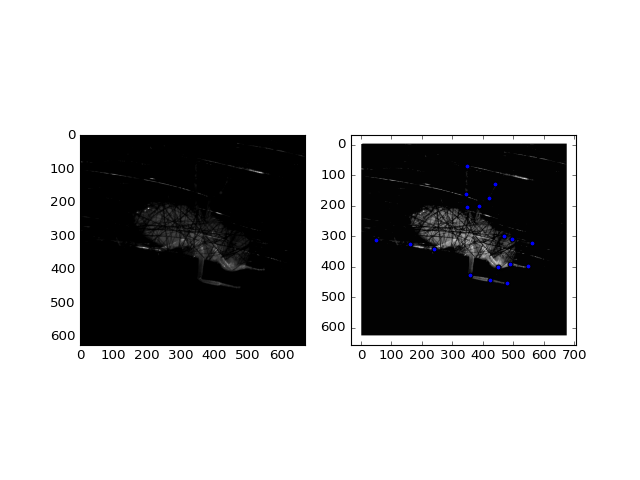

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipykernel/comm/comm.py:41: Deprecation

In [6]:
%pylab notebook
fig,ax = plt.subplots(1,2)
ax[0].imshow(o[0,0,:,:],cmap='gray')
ax[1].imshow(d[0,...,0],cmap='gray')
ax[1].scatter(l[0,:,0],l[0,:,1])

In [1]:
import tensorflow as tf

x0 = tf.placeholder(tf.float32, [None, 
                                 50,
                                 50,1],name='x0')


In [5]:
print x0.get_shape()[3]

1


In [6]:
vv = [1,2,3]
v1,v2,v3 = vv
print v2

2


In [12]:
xx = np.random.random([5,100,100,1])
yy = np.tile(xx,3)
print yy.shape

(5, 100, 100, 3)
